<a href="https://colab.research.google.com/github/ericliudx/ISE694HW1/blob/main/ISE_694_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
train_data = {
    "x1": [25, 10.77, 19.09, 28.14, 9.08, 21.08, 5.01, 13.65, 24.62, 9.77,
           11.69, 2.31, 3.29, 5.67, 12.44, 6.79, 0, 2.92, 8.5, 3.58,
           4.84, 16.5, 24.67, 8.99, 2.57, 27.43, 6.93, 17.2, 9.49, 13.49,
           6.33, 4.74, 4.28, 11.32, 6.08, 17.13, 19.64, 10.56, 10.86, 3.54,
           5.93, 15.73, 7.97, 12.89, 16.13],
    "x2": [5.06, 6.38, 7.46, 9.49, 8.1, 9.38, 5.23, 1.56, 3.43, 4.28,
           3.13, 8.73, 5.32, 3.09, 7.47, 5.62, 0, 7.96, 5.93, 4.25,
           5.41, 7.62, 10.43, 6.37, 4.22, 6.5, 3.92, 5.2, 3.67, 6.58,
           4.01, 7.67, 5.39, 7.19, 8.32, 8.56, 5.34, 7.29, 4.18, 6.52,
           3.3, 8.96, 5.3, 6.93, 8.54],
    "x3": [12.99, 4.03, 7.64, 9.96, 5.79, 7.61, 4.15, 7.37, 12.21, 7.03,
           4.93, 2.69, 3.33, 2.77, 5.92, 3.79, 3.32, 2.27, 3.24, 3.51,
           4.14, 7.38, 6.79, 5.37, 3.28, 11.14, 4.17, 7.67, 5.59, 5.75,
           2.98, 4.91, 2.76, 8.74, 6.21, 9.3, 11.44, 9.49, 3.35, 3.23,
           3.69, 14.53, 6.39, 8.06, 8.9],
    "y": [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1]
}

train_df = pd.DataFrame(train_data)

# Testing data
test_data = {
    "x1": [3.34, 11.68],
    "x2": [6, 4.25],
    "x3": [2.56, 7.56],
    "y": ["?", "?"]
}

test_df = pd.DataFrame(test_data)

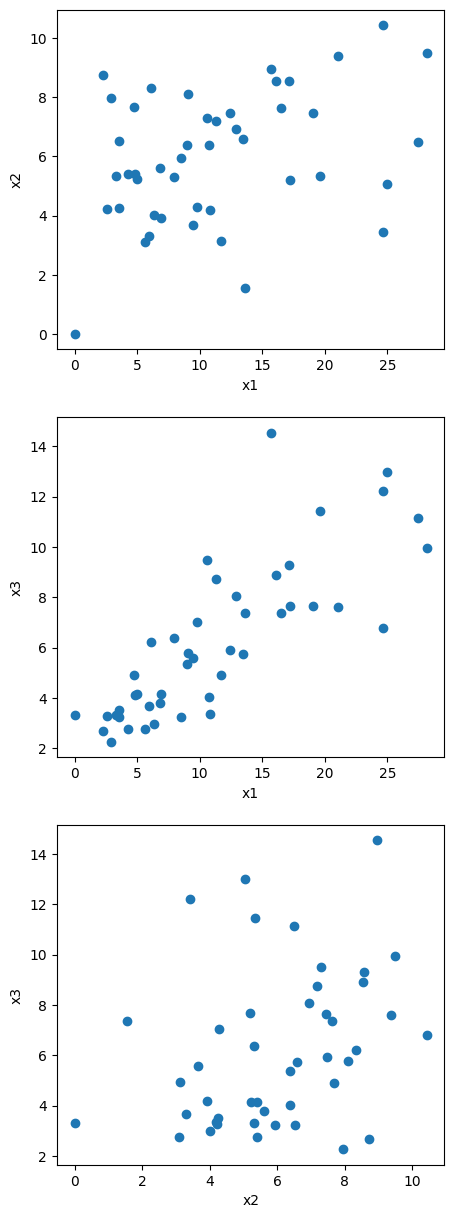

In [33]:
fig, ax = plt.subplots(3,1, figsize=(5,15))

ax[0].scatter(train_df['x1'], train_df['x2'])
ax[0].set_xlabel("x1")
ax[0].set_ylabel("x2")

ax[1].scatter(train_df['x1'], train_df['x3'])
ax[1].set_xlabel("x1")
ax[1].set_ylabel("x3")

ax[2].scatter(train_df['x2'], train_df['x3'])
ax[2].set_xlabel("x2")
ax[2].set_ylabel("x3")

plt.show()

From these plots, we can see that there is a positive correlation between X1 and X3, but there is not much correlation between X1 and X2 and X2 and X3.

In [40]:
counts = train_df['y'].value_counts()
print(counts)
priors = {
    0 : counts[0]/(counts[0] + counts[1]),
    1 : counts[1]/(counts[0] + counts[1]),
}
prior_0 = counts[0]/(counts[0] + counts[1])
prior_1 = counts[1]/(counts[0] + counts[1])

y
1    25
0    20
Name: count, dtype: int64


In [41]:
means = {
    'x1' : train_df.groupby('y')['x1'].mean(),
    'x2' : train_df.groupby('y')['x2'].mean(),
    'x3' : train_df.groupby('y')['x3'].mean()
}
vars = {
    'x1' : train_df.groupby('y')['x1'].var(),
    'x2' : train_df.groupby('y')['x2'].var(),
    'x3' : train_df.groupby('y')['x3'].var()
}

In [42]:
def gaussian_likelihood(x, mean, var):
    return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-((x - mean) ** 2) / (2 * var))

# Compute posterior for a single test point
def classify(x, feature):
    scores = {}
    for cls in priors:  # cls = class label like 0,1,2...
        # get mean and variance for this feature and class
        mu = means[feature][cls]
        var = vars[feature][cls]
        likelihood = gaussian_likelihood(x, mu, var)
        scores[cls] = priors[cls] * likelihood
    # Normalize
    total = sum(scores.values())
    for cls in scores:
        scores[cls] /= total
    return max(scores, key=scores.get)

In [45]:
print(classify(test_df.iloc[0]['x1'], 'x1'))
print(classify(test_df.iloc[1]['x1'], 'x1'))

print(classify(test_df.iloc[0]['x2'], 'x2'))
print(classify(test_df.iloc[1]['x2'], 'x2'))

print(classify(test_df.iloc[0]['x3'], 'x3'))
print(classify(test_df.iloc[1]['x3'], 'x3'))

1
1
1
1
0
1


The classifyer has classified both data points as Class 1, except the first training data when only using class3.

In [46]:
def classify_row(row, features):
    scores = {}
    for cls in priors:  # cls = 0, 1, ...
        likelihood = priors[cls]
        for feature in features:
            mu = means[feature][cls]
            var = vars[feature][cls]
            likelihood *= gaussian_likelihood(row[feature], mu, var)
        scores[cls] = likelihood
    # Normalize
    total = sum(scores.values())
    for cls in scores:
        scores[cls] /= total
    return max(scores, key=scores.get), scores

In [47]:
test_point = test_df.iloc[0]
pred_class, probs = classify_row(test_point, ['x1', 'x2'])
print("Predicted:", pred_class)
print("Posterior probs:", probs)

Predicted: 1
Posterior probs: {0: np.float64(0.38420290514961986), 1: np.float64(0.61579709485038)}


In [48]:
test_point = test_df.iloc[1]
pred_class, probs = classify_row(test_point, ['x1', 'x2'])
print("Predicted:", pred_class)
print("Posterior probs:", probs)

Predicted: 1
Posterior probs: {0: np.float64(0.42051996800427316), 1: np.float64(0.5794800319957268)}


Using both x1 and x2, we have classified both training points as class1 as well.